# Lab Notebook

    Course: BioE 131
    Lab No: Lab #6
    Submission date: 03/10/2018
    
    Team members: Michael Fernandez, Jinho Ko
    

# 1. Processing Data via Terminal

![commands.PNG](./commands.PNG)

### First, run  
To commpare reads to human:
'''python
bowtie2 –p 4 --very-fast --no-unal -x database -U reads.fastq -S output.sam--un unaligned.fastq
'''

To compare reads to S. oneidensis MR-1:
bowtie2 –p 4 --very-fast --no-unal -x database -U reads.fastq -S output.sam--un unaligned.fastq

### Then convert all files to bam files  
samtools view –b my_alignment.sam > my_alignment.bam

### Then do sorting  
samtools sort my_alignment.bam > my_alignment.sorted.bam

### Then do indexing   
samtools index my_alignment.sorted.bam

### Then we depth it  
samtools depth –a my_alignment.sorted.bam > pileup.tab


# Graphing

What is the min, max, and mean coverage across all positions?



In [1]:
rs_io = open('R_S.tab','r')
rs_list = []

for line in rs_io.read().split('\n'):
    rs = line.split('\t')
    #print(rs)
    if len(rs) <3:
        continue
    rs[1] = int(rs[1])
    rs[2] = int(rs[2])
    #print(rs[0],rs[1],rs[2])
    rs_list.append(rs)
    
rs_io.close()
print('Saved!')


Saved!


In [83]:
rh_io = open('RHnew.tab','r')
rh_list = []

print('st')
for line in rh_io.read().split('\n'):
    
    rh = line.split('\t')
    if len(rh) <3:
        continue
    rh[1] = int(rh[1])
    rh[2] = int(rh[2])
    rh_list.append(rh)
    
rh_io.close()
print('Saved!')

st
Saved!


# Plotting Graphs 

loading!...
loaded! building...
drawing...


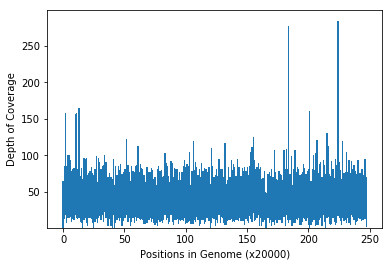

histogram


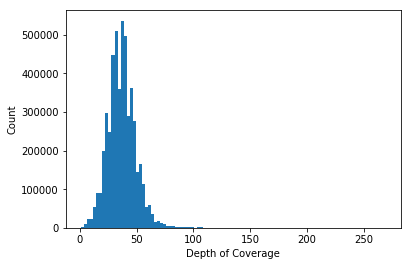

done!


In [74]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import numpy as np

print('loading!...')

ind = []
ly = []

def average(lis):
    return sum(lis)/len(lis)

def refactor(arr, delta, func) :
    
    n = int(len(arr)/delta)
    newarr = []
    for i in range(n):
        newarr.append(func(arr[i*delta:(i+1)*delta]))
#     leftover_index = len(arr)-n*delta
#     newarr.append(func(arr[leftover_index:-1]))
    
    return newarr

for x in rs_list:
    ind.append(x[1])
    ly.append(x[2])
    
DELTA = 20000   # we set DELTA, as a length of each data CHUNKS

ind = refactor(ind, DELTA, average)
ind = [int(i) for i in ind]

ly_max = refactor(ly, DELTA, max)
ly_min = refactor(ly, DELTA, min)

print('loaded! building...')
p1 = plt.bar(np.arange(len(ly_max)),ly_max, 1.0, bottom = ly_min )  # plot mininum to maximum values in each chunk

plt.xlabel('Positions in Genome (x'+str(DELTA)+')' )
plt.ylabel('Depth of Coverage')

print('drawing...')

index = [ (ind[0]+i*DELTA) for i in range( int((ind[-1]-ind[0])/DELTA) ) ]
#plt.xticks( index )
plt.show()

plt.xlabel('Depth of Coverage' )
plt.ylabel('Count')
p2 = plt.hist(ly, bins=100)
print('histogram')

plt.show()

print('done!')

# Extra credit 1 : Graphing Human genome results, sex identification

st
[24925062, 24319937, 19802243, 19115427, 18091526, 17111506, 15913866, 14636402, 14121343, 13553474, 13500651, 13385189, 11516987, 10734954, 10253139, 9035475, 8119521, 7807724, 5912898, 6302552, 4812989, 5130456, 15527056, 5937356]


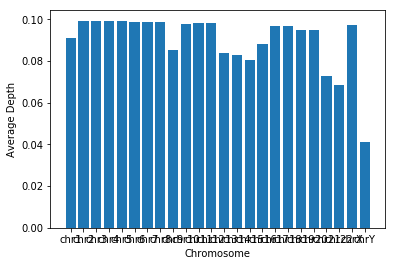

In [114]:
#rh_list

#figure(num=None, figsize=(17, 10), dpi=50)

print('st')
chr_list = []
sum_list = [0 for i in range(24)]

for i in range(1,23):
    chr_list.append('chr'+str(i))
chr_list.append('chrX')
chr_list.append('chrY')

for i in rh_list:
    if i[0] not in chr_list:
        continue
    idx = chr_list.index(i[0])
    sum_list[idx]+=i[2]
    avg_list[idx]+=1

len_io = open('RHnew.sam','r')
len_list = [0 for _ in range(24)]

for n, line in enumerate(len_io.read().split('\n')):

    if not 0 in len_list:
        break

    if 'LN' in line:
        len_list[n-1] = int(line[line.index('LN:')+3:-1])

len_io.close()
            
print(len_list)

#print(chr_list, sum_list)

#print([sum_list[i]/avg_list[i] for i in range(24)])

p3 = plt.bar(np.arange(24),[ sum_list[i]/len_list[i] for i in range(24)], 0.8 )
plt.xlabel('Chromosome' )
plt.ylabel('Average Depth')

#plt.ylim([0.999,1.002])
plt.xticks(np.arange(24), chr_list)

plt.show()

Since there are Y in chromosome, we guess that Jamie is men.

# Extra credit 2 : BLAST high-depth sequences

Find out all the sequence number that has depth>1 from human tab files

In [122]:
print('st')

blast = []

ON = False

for i in rh_list:
    
    if i[2] >1:
        if not ON:
            #print('ON!')
            ON = True
            print(i[0])
            print(str(i[1])+' : ',end='')
            blast.append(str(i[1]))
    else:
        if ON:
            print(i[1])
            #print('OFF')
            ON = False
            

st
chr7
84306892 : 84306947
chr12
45285619 : 45285689
chr15
30510261 : 30510286
chr15
34688969 : 34689020
chr16
33097974 : 33098091
chrY
18485047 : 18485209
chrY
27170225 : 27170465


Find out sequence data from the reads(sam file), and BLAST them.

In [118]:
len_io = open('RHnew.sam','r')
len_list = [0 for _ in range(24)]

for n, line in enumerate(len_io.read().split('\n')):
    for num in blast:
        if num in line:
            print(line)

read77943	16	chrY	18485047	1	300M	*	0	0	TTGTAAACTCTTACAATGAACTCATAAAGTTAGAACAAAGTTAAAAATAATTGCTATCTAAGTATCAGAGTTAGAATAAATTATTCCCAAGGTTTCCCCTCACTTTAAGTTTCCCTGATTCTTGTATTTTTTACTTAAATTGGATATACAATTACTATTTTTTCATTATTTAATTCATAATACATTTGGTAAAATAATTTCTTTTTAAGTAAAACATTTAATAGTGCAGTTTGGTTCGTGTTAATTATACTTCAACGAACCCCTTATGTTACTTGCCTAGTGACAGAGTATGTGGGTAAA	BGFGFB5=>@GFFFG'GFFGEAFFGCF4=>FFFG1D@<BD7@4E?F0DCGEGFFGGC7>:>CDG-GFGGAGGGGGEGGFB=FEGFFGFGCGEEFGEGFFGG?FFBCGAGGGEEGGGAGGDGDG@?GD/EGFGF-<:FDFGG46G9GFFAFFGFGGGFGGCGE&FGFGFGGGEGG>DFG(EEGGGFEGG:DFGGGFGGGFG:GGGGGFGFBEGAFCCFFGGFEGGGGGGGGGG7AEFEGFFGCGGG;GGGGDFFFEG:GGEEFFGGEGGGGDGEC<FGAGCGG6GFGBD4EGGGGCGGGFG	AS:i:-5	XS:i:-5	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:154T145	YT:Z:UU
read334190	16	chr15	30510261	1	300M	*	0	0	TGCCTTTTTGTAACTTAATCTCAGAAGTGACATCTGCTGTGTTCTGTATGTTAGAAGTGAGTCACTAAGTCCAGCTGAAACTCAGGGGAGGGCTTGCCTACCAGGAGGCAGGAATCACCAGGACCCATCAGAGACACCGTCTACCCCAGTCTGTGCTCGGGTCCTTCATGTCTCTCCCTCCTGAAATTTGATAGATTCTGCAAAAGAAAAAGCCTTGATCCACGCTGCTTTCTAGAATGTTGTA

## BLAST results

#### What gene that the sequence features?

1.  
neuroligin-4, Y-linked isoform X4  
testis-specifig XK-related protein, Y-linked 2  
![1.jpg](blast_img/1.JPG)

2.  
?  
![2.jpg](blast_img/2.JPG)

3.  
testis-specific basic protein Y 2  
deleted in azoospermia protein 1  
![3.jpg](blast_img/3.JPG)

4.  
protein kinase C-binding protein Nell2 isoform d  
![4.jpg](blast_img/4.JPG)

5.  
TP53-target gene 3 protein isoform X2  
immunoglobulin heavy variable 3-11-like  
![5.jpg](blast_img/5.JPG)

6.
semaphorin-3A isoform X1  
semaphorin-3D isoform X1  
![6.jpg](blast_img/6.JPG)

7.  
golgin subfamily A member 8A isoform X2  
golgin subfamily A member 8B isoform X2  
![7.jpg](blast_img/7.JPG)

